<a href="https://colab.research.google.com/github/prashuprajapati/fashion_mnist_module/blob/main/fashion_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# create a model to predict fashion_image ==> (T-shirt/top ,Trouser ,Pullover ,Dress ,Coat ,Sandal ,Shirt ,Sneaker ,Bag ,Ankleboot)

# it is content 60,000 images with image_size(28,28) for training
# it is content 10,000 images for testing 


---

# Fashion-MNIST(classification of 10 fashion categories)

In [ ]:
from keras.datasets import fashion_mnist
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
#xtrain.shape
xtrain.shape

(60000, 28, 28)

In [ ]:
xtrain1 = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
xtest1 = xtest.reshape((xtest.shape[0], 28, 28, 1))

In [ ]:
train_norm = xtrain1.astype('float32')
test_norm = xtest1.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
train_norm.shape

(60000, 28, 28, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
model=Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(1050,activation='relu'))
model.add(Dense(1050,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_norm,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.4692 - accuracy: 0.8286
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3568 - accuracy: 0.8698
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3210 - accuracy: 0.8819
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2948 - accuracy: 0.8897
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2773 - accuracy: 0.8963
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2624 - accuracy: 0.9013
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2479 - accuracy: 0.9066
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2417 - accuracy: 0.9086
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2262 - accuracy: 0.9130
Epoch 10/10
1875/1875 [==============================] - 35s 18m

In [ ]:
import numpy as np
a=model.predict(test_norm)

313/313 [==============================] - 2s 5ms/step


0-T-shirt/top 1-Trouser 2-Pullover 3-Dress 4-Coat 5-Sandal 6-Shirt 7-Sneaker 8-Bag 9-Ankleboot 

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


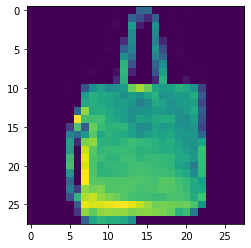

In [ ]:
import random as rd
import matplotlib.pyplot as plt
index=rd.randint(0,len(test_norm))
b=a[index] # return the list of numeric values 
j=np.argmax(b)
b=[0,0,0,0,0,0,0,0,0,0]
b[j]=1
feature=['0-T-shirt/top','1-Trouser','2-Pullover','3-Dress','4-Coat','5-Sandal','6-Shirt','7-Sneaker','8-Bag','9-Ankleboot']
for i in feature:
  print(i,end=' ')
print('\n')
print(b)
plt.imshow(xtest[index])